# Clustering

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## What Is Clustering?

**Clustering is the task of partitioning the dataset into groups, called clusters.**



**Meaningful clusters** expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

**Useful clusters**, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

## Overview of Clustering Techniques

<img loading="lazy" class="img-fluid mx-auto d-block " src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" >

<table class="colwidths-given docutils align-default">
<colgroup>
<col style="width: 15%">
<col style="width: 16%">
<col style="width: 20%">
<col style="width: 27%">
<col style="width: 22%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Method name</p></th>
<th class="head"><p>Parameters</p></th>
<th class="head"><p>Scalability</p></th>
<th class="head"><p>Usecase</p></th>
<th class="head"><p>Geometry (metric used)</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><a class="reference internal" href="#k-means"><span class="std std-ref">K-Means</span></a></p></td>
<td><p>number of clusters</p></td>
<td><p>Very large <code class="docutils literal notranslate"><span class="pre">n_samples</span></code>, medium <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code> with
<a class="reference internal" href="#mini-batch-kmeans"><span class="std std-ref">MiniBatch code</span></a></p></td>
<td><p>General-purpose, even cluster size, flat geometry,
not too many clusters, inductive</p></td>
<td><p>Distances between points</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#affinity-propagation"><span class="std std-ref">Affinity propagation</span></a></p></td>
<td><p>damping, sample preference</p></td>
<td><p>Not scalable with n_samples</p></td>
<td><p>Many clusters, uneven cluster size, non-flat geometry, inductive</p></td>
<td><p>Graph distance (e.g. nearest-neighbor graph)</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="#mean-shift"><span class="std std-ref">Mean-shift</span></a></p></td>
<td><p>bandwidth</p></td>
<td><p>Not scalable with <code class="docutils literal notranslate"><span class="pre">n_samples</span></code></p></td>
<td><p>Many clusters, uneven cluster size, non-flat geometry, inductive</p></td>
<td><p>Distances between points</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#spectral-clustering"><span class="std std-ref">Spectral clustering</span></a></p></td>
<td><p>number of clusters</p></td>
<td><p>Medium <code class="docutils literal notranslate"><span class="pre">n_samples</span></code>, small <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code></p></td>
<td><p>Few clusters, even cluster size, non-flat geometry, transductive</p></td>
<td><p>Graph distance (e.g. nearest-neighbor graph)</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="#hierarchical-clustering"><span class="std std-ref">Ward hierarchical clustering</span></a></p></td>
<td><p>number of clusters or distance threshold</p></td>
<td><p>Large <code class="docutils literal notranslate"><span class="pre">n_samples</span></code> and <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code></p></td>
<td><p>Many clusters, possibly connectivity constraints, transductive</p></td>
<td><p>Distances between points</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#hierarchical-clustering"><span class="std std-ref">Agglomerative clustering</span></a></p></td>
<td><p>number of clusters or distance threshold, linkage type, distance</p></td>
<td><p>Large <code class="docutils literal notranslate"><span class="pre">n_samples</span></code> and <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code></p></td>
<td><p>Many clusters, possibly connectivity constraints, non Euclidean
distances, transductive</p></td>
<td><p>Any pairwise distance</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="#dbscan"><span class="std std-ref">DBSCAN</span></a></p></td>
<td><p>neighborhood size</p></td>
<td><p>Very large <code class="docutils literal notranslate"><span class="pre">n_samples</span></code>, medium <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code></p></td>
<td><p>Non-flat geometry, uneven cluster sizes, outlier removal,
transductive</p></td>
<td><p>Distances between nearest points</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#optics"><span class="std std-ref">OPTICS</span></a></p></td>
<td><p>minimum cluster membership</p></td>
<td><p>Very large <code class="docutils literal notranslate"><span class="pre">n_samples</span></code>, large <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code></p></td>
<td><p>Non-flat geometry, uneven cluster sizes, variable cluster density,
outlier removal, transductive</p></td>
<td><p>Distances between points</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="mixture.html#mixture"><span class="std std-ref">Gaussian mixtures</span></a></p></td>
<td><p>many</p></td>
<td><p>Not scalable</p></td>
<td><p>Flat geometry, good for density estimation, inductive</p></td>
<td><p>Mahalanobis distances to  centers</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="#birch"><span class="std std-ref">BIRCH</span></a></p></td>
<td><p>branching factor, threshold, optional global clusterer.</p></td>
<td><p>Large <code class="docutils literal notranslate"><span class="pre">n_clusters</span></code> and <code class="docutils literal notranslate"><span class="pre">n_samples</span></code></p></td>
<td><p>Large dataset, outlier removal, data reduction, inductive</p></td>
<td><p>Euclidean distance between points</p></td>
</tr>
</tbody>
</table>

<img src="images/flat-nonflat.png">

### Partitional Clustering

<section class="section3" id="partitional-clustering">
<p><strong>Partitional clustering</strong> divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object. </p>


<img src="https://microsoft.github.io/ML-For-Beginners/5-Clustering/1-Visualize/./images/centroid.png" data-origin="./images/centroid.png" alt="Centroid clustering Infographic">

- These techniques require the user to specify the number of clusters, indicated by the variable k.
- Two examples of partitional clustering algorithms are k-means and k-medoids
- nondeterministic

- Prednosti:
    - They work well when clusters have a spherical shape.
    - They’re scalable with respect to algorithm complexity.
- Slabosti:
    - They’re not well suited for clusters with complex shapes and different sizes.
    - They break down when used with clusters of different densities.

### Hierarchical Clustering

<section class="section3" id="hierarchical-clustering">
<p><strong>Hierarchical clustering</strong> determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:</p>


- These methods produce a tree-based hierarchy of points called a dendrogram
-  hierarchical clustering is a deterministic process
- Prednosti:
    - They often reveal the finer details about the relationships between data objects.
    - dendrogram
- Slabosti:
    - They’re computationally expensive with respect to algorithm complexity.
    - They’re sensitive to noise and outliers.

<img src="https://microsoft.github.io/ML-For-Beginners/5-Clustering/1-Visualize/./images/hierarchical.png" data-origin="./images/hierarchical.png" alt="Hierarchical clustering Infographic">

### Density-Based Clustering

<section class="section3" id="density-based-clustering">
<p><strong>Density-based clustering</strong> determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions. </p>


-  this approach doesn’t require the user to specify the number of clusters
- Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.
- Prednosti:
    - excel at identifying clusters of nonspherical shapes
    - They’re resistant to outliers.
- Slabosti:
    - They aren’t well suited for clustering in high-dimensional spaces.
    - They have trouble identifying clusters of varying densities.

## k-Means Clustering

- **k-means clustering** is one of the **simplest and most commonly used** clustering algorithms.

- It tries to find cluster centers that are representative of certain regions of the data. 
- Conventional k-means requires only a few steps. **The first step is to randomly select k centroids, where k is equal to the number of clusters you choose**. 
- Centroids are data points representing the center of a cluster.
- Then the algorithm alternates between two steps: 
    1. assigning each data point to the closest cluster center
    2. then setting each cluster center as the mean of the data points that are assigned to it. 


- The algorithm is finished when the assignment of instances to clusters no longer changes.

<img loading="lazy" class="img-fluid mx-auto d-block " src="https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png" width="1186" height="332" srcset="https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png&amp;w=296&amp;sig=efa46cf1bfa03d5dac763ccfd1e1ed573afdc86a 296w, https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png&amp;w=593&amp;sig=5d5c01463b76abb809eb35ae90ca916bb34d2bb7 593w, https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png 1186w" sizes="75vw" alt="k means algorithm">

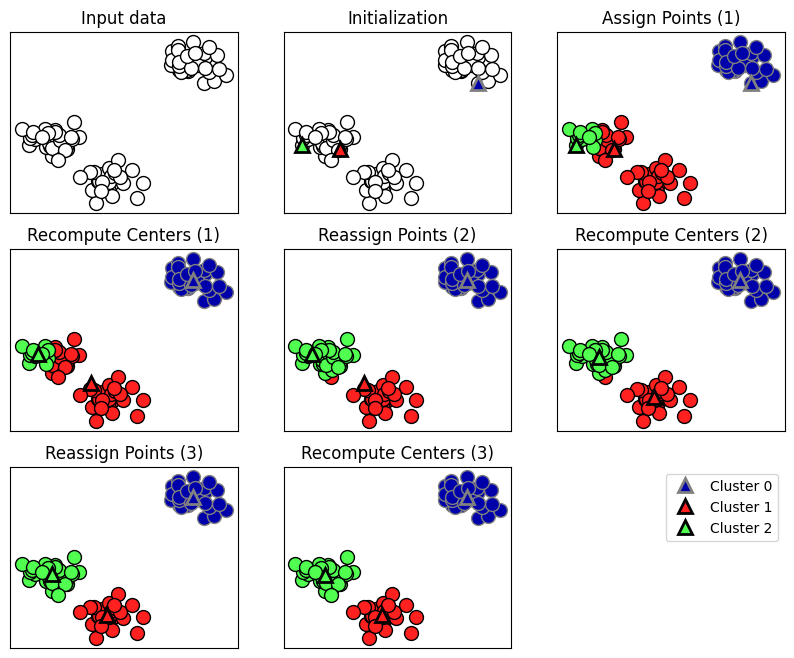

In [2]:
from helpers.plot_kmeans import plot_kmeans_algorithm

plot_kmeans_algorithm()

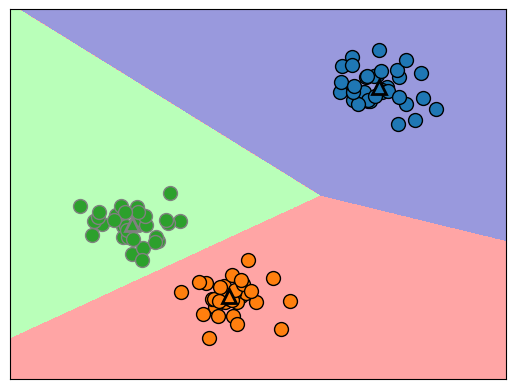

In [3]:
from helpers.plot_kmeans import plot_kmeans_boundaries

plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

In [5]:
# build the clustering model
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [6]:
print(f"Cluster memberships:\n{kmeans.labels_}")

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [7]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [8]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

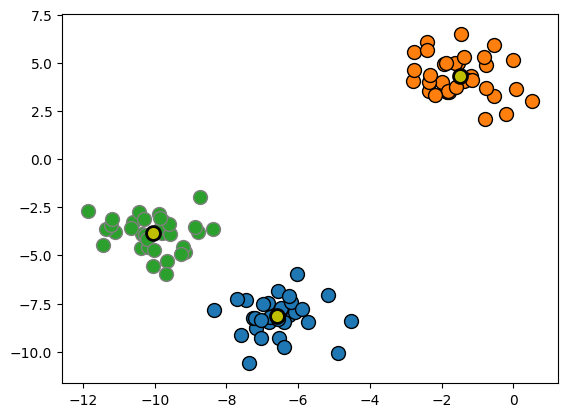

In [9]:
from helpers.plot_helpers import discrete_scatter

discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='o', markeredgewidth=2, c='y')
plt.show()

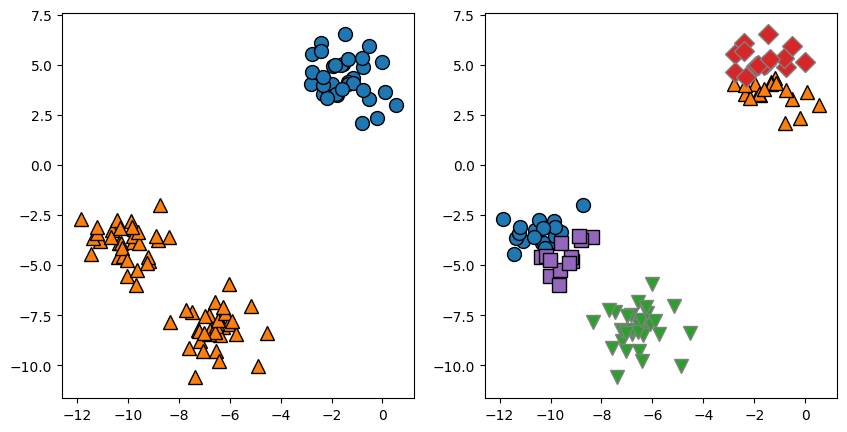

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_
discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_
discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

### Failure cases of k-means

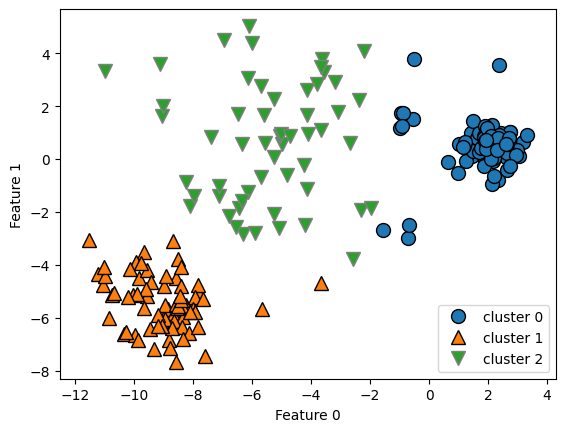

In [11]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_varied)

discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

/tmp/ipykernel_2791176/1002995869.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='y', s=100, linewidth=2, cmap=cm3)


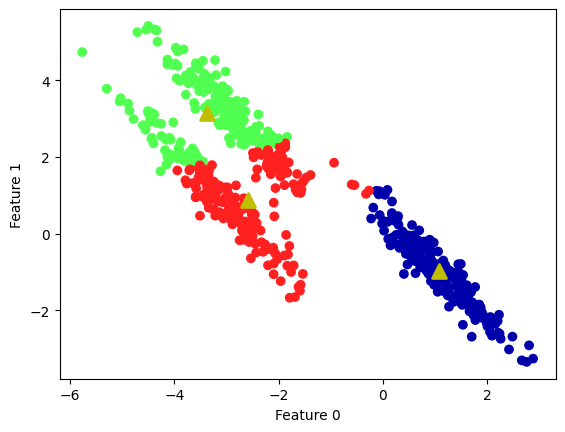

In [12]:
from helpers.plot_helpers import cm3

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='y', s=100, linewidth=2, cmap=cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

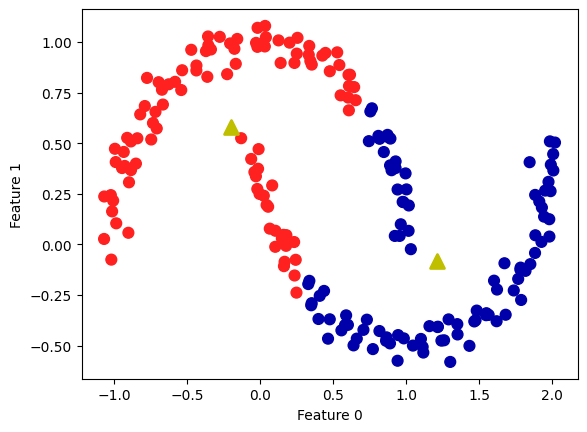

In [13]:
# generate synthetic two_moons data
from sklearn.datasets import make_moons
from helpers.plot_helpers import cm2

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c="y", s=100, linewidth=2)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

- MiniBatchKMeans

### Understanding the K-Means Algorithm

<img loading="lazy" class="img-fluid mx-auto d-block w-50" src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" width="576" height="576" srcset="https://files.realpython.com/media/centroids_iterations.247379590275.gif 144w, https://files.realpython.com/media/centroids_iterations.247379590275.gif 288w, https://files.realpython.com/media/centroids_iterations.247379590275.gif 576w" sizes="75vw" alt="k means centroids iterations">

### Choosing the Appropriate Number of Clusters

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

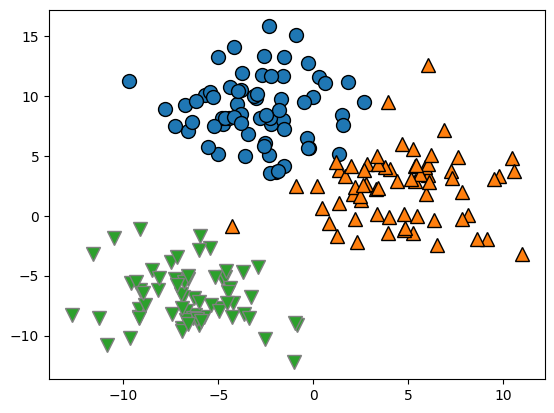

In [15]:
discrete_scatter(features[:, 0], features[:, 1], true_labels) # v realnosti nimamo pravih vrednosti
plt.show()

In [16]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [17]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(    
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [21]:
kmeans.fit(scaled_features)

KMeans(n_clusters=3, n_init=10, random_state=42)

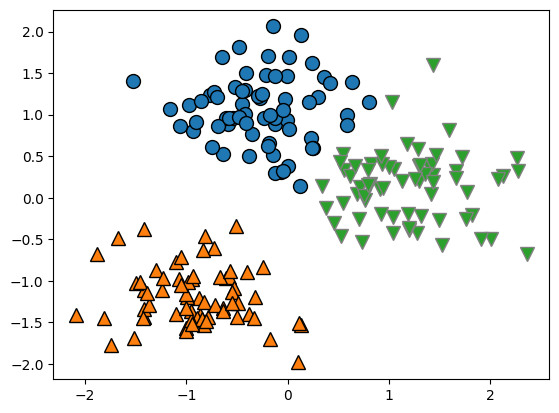

In [22]:
y_pred = kmeans.predict(scaled_features)
discrete_scatter(scaled_features[:, 0], scaled_features[:, 1], y_pred)
plt.show()

In [23]:
# The lowest SSE value
kmeans.inertia_

74.57960106819851

In [24]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [25]:
# The number of iterations required to converge
kmeans.n_iter_

3

In [26]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [27]:
# The elbow method
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

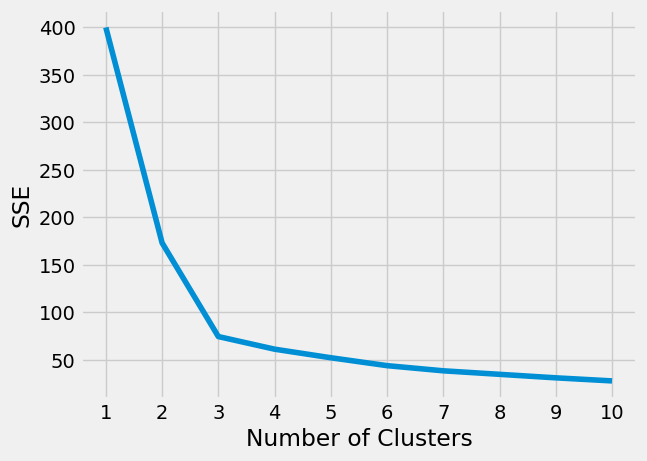

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [29]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [30]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

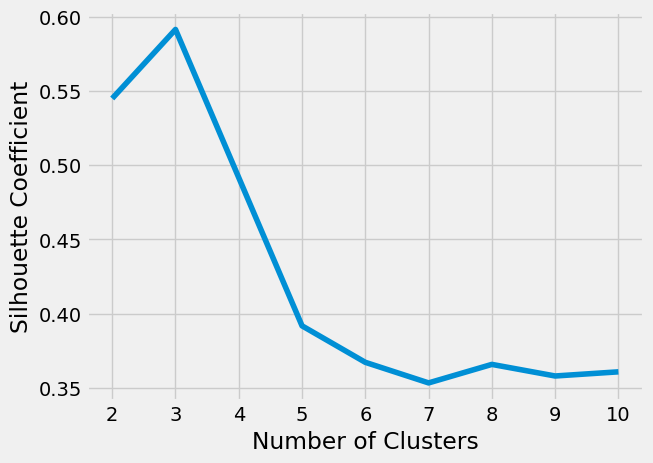

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Agglomerative Clustering

**Agglomerative clustering** refers to a collection of clustering algorithms that all build
upon the same principles: 
1. the algorithm starts by declaring each point its own cluster
2. then merges the two most similar clusters until some stopping criterion is satisfied.


In [ ]:
from helpers.plot_agglomerative import plot_agglomerative_algorithm

plt.style.use("default")
plot_agglomerative_algorithm()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

In [ ]:
discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()
plt.plot()

### Hierarchical clustering and dendrograms

In [ ]:
from helpers.plot_agglomerative import plot_agglomerative

plot_agglomerative()

In [ ]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

In [ ]:
linkage_array

In [ ]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

## DBSCAN

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print(f"Cluster memberships:\n{clusters}")

In [ ]:
from helpers.plot_dbscan import plot_dbscan

plot_dbscan()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from helpers.plot_helpers import cm2

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Comparing and Evaluating Clustering Algorithms

### Evaluating clustering with ground truth

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=cm3, s=60)
axes[0].set_title(f"Random assignment - ARI: {adjusted_rand_score(y, random_clusters):.2f}\n \
Random assignment - NMI - {normalized_mutual_info_score(y, random_clusters):.2f}")

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters):.2f}\n \
{algorithm.__class__.__name__} - NMI - {normalized_mutual_info_score(y, clusters):.2f}")
    
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print(f"Accuracy: {accuracy_score(clusters1, clusters2):.2f}")

# adjusted rand score is 1, as the clustering is exactly the same
print(f"ARI: {adjusted_rand_score(clusters1, clusters2):.2f}")

### Evaluating clustering without ground truth

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} : {silhouette_score(X_scaled, clusters):.2f}".format())
    
plt.show()

## Comparing algorithms on the faces dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [ ]:
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

In [ ]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [ ]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)

pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

### Analyzing the faces dataset with DBSCAN

In [ ]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print(f"Unique labels: {np.unique(labels)}")

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)

print(f"Unique labels: {np.unique(labels)}")

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)

print(f"Unique labels: {np.unique(labels)}")

In [ ]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print(f"Number of points per cluster: {np.bincount(labels + 1)}")

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    
plt.show()

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print(f"\neps={eps}")
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print(f"Clusters present: {np.unique(labels)}")
    print(f"Cluster sizes: {np.bincount(labels + 1)}")

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

### Analyzing the faces dataset with k-means

In [ ]:
# extract clusters with k-means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print(f"Cluster sizes k-means: {np.bincount(labels_km)}")

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [ ]:
from helpers.plot_kmeans import plot_kmeans_faces

plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

### Analyzing the faces dataset with agglomerative clustering

In [ ]:
#extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)

print(f"Cluster sizes agglomerative clustering: {np.bincount(labels_agg)}")

In [ ]:
print(f"ARI: {adjusted_rand_score(labels_agg, labels_km):.2f}")

In [ ]:
linkage_array = ward(X_pca)

# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

In [ ]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print(f"cluster sizes agglomerative clustering: {np.bincount(labels_agg)}")

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel(f"#{cluster}: {cluster_size}")
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)